In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [19]:
df=pd.read_csv('/emails.csv')

In [20]:
df.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [41]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [42]:
X=df[['the', 'to','ect','and','for','a']]
y=df['Prediction']

In [43]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [44]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred=model.predict(X_test)

In [46]:
r2=r2_score(y_test,y_pred)

In [47]:
r2

-0.23966828804447204

In [48]:
mse = mean_squared_error(y_test,y_pred)

In [49]:
mse

0.2531400966183575

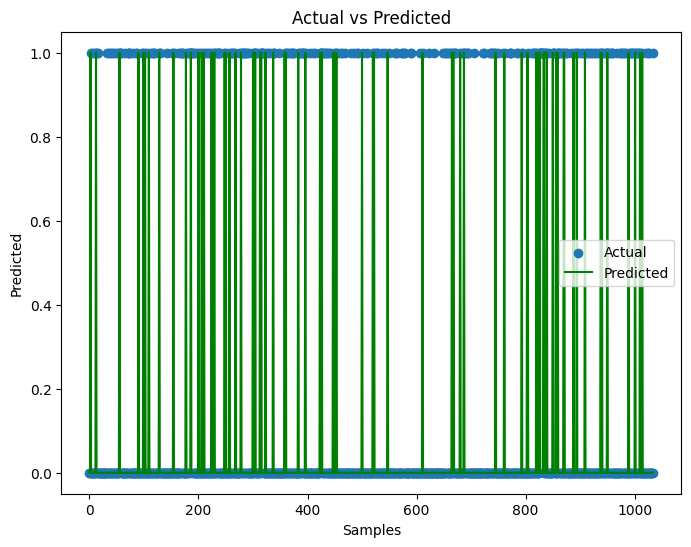

In [51]:
# 9. Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(y_pred)), y_pred, color= "green",label="Predicted")
plt.title("Actual vs Predicted")
plt.xlabel("Samples")
plt.ylabel("Predicted")
plt.legend()
plt.show()

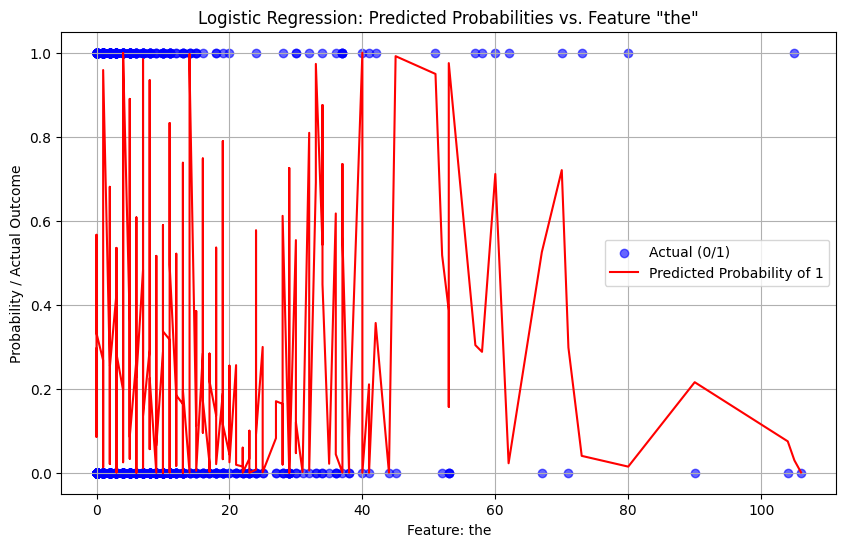

In [29]:
# Get predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'feature_the': X_test['the'],
    'predicted_proba': y_pred_proba,
    'actual_y': y_test
})

# Sort by the feature for better visualization
plot_df = plot_df.sort_values(by='feature_the')

plt.figure(figsize=(10, 6))
plt.scatter(plot_df['feature_the'], plot_df['actual_y'], color='blue', label='Actual (0/1)', alpha=0.6)
plt.plot(plot_df['feature_the'], plot_df['predicted_proba'], color='red', label='Predicted Probability of 1')
plt.title('Logistic Regression: Predicted Probabilities vs. Feature "the"')
plt.xlabel('Feature: the')
plt.ylabel('Probability / Actual Outcome')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
spam = X_test_scaled[:3]

In [59]:
spam

array([[-0.4798326 , -0.54744781, -0.29769354, -0.5074013 , -0.45269485,
        -0.59035064],
       [ 0.54370582,  1.45707263,  4.36485418,  0.80557395,  1.45659234,
         1.63007443],
       [-0.4798326 ,  0.82406618, -0.15423053,  0.47733014, -0.24055183,
         2.13259168]])

In [60]:
probabilities = model.predict_proba(spam)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [61]:
probabilities

array([[0.66076925, 0.33923075],
       [0.83786269, 0.16213731],
       [0.63986647, 0.36013353]])

The `probabilities` array you have shows the output of the sigmoid function for each class. The second column (`probabilities[:, 1]`) is the probability that the email is spam (class 1). We can classify an email as spam if this probability is greater than a certain threshold, typically 0.5.

In [62]:
print("Probabilities of not spam (0) and spam (1):")
print(probabilities)

# We can also get the direct predictions (0 or 1) based on a 0.5 threshold
spam_predictions = model.predict(spam)
print("\nDirect predictions (0=not spam, 1=spam):")
print(spam_predictions)

Probabilities of not spam (0) and spam (1):
[[0.66076925 0.33923075]
 [0.83786269 0.16213731]
 [0.63986647 0.36013353]]

Direct predictions (0=not spam, 1=spam):
[0 0 0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Let's predict whether a new, hypothetical email is spam or not. You'll need to provide values for the features your model was trained on.

In [63]:
# Define feature values for a new email (e.g., number of occurrences of 'the', 'to', 'ect', 'and', 'for', 'a')
# Make sure the order matches the features used in X
# Example: values for ['the', 'to', 'ect', 'and', 'for', 'a']
new_email_features = np.array([[5, 10, 2, 1, 3, 20]]) # Example values: adjust these as needed

# Reshape if new_email_features is a 1D array to a 2D array (1 sample, N features)
# If you're providing a 2D array directly, this step is not strictly necessary
# new_email_features = new_email_features.reshape(1, -1)

# Scale the new email features using the *same* scaler fitted on the training data
new_email_scaled = scaler.transform(new_email_features)

print(f"Scaled features for the new email:\n{new_email_scaled}")

# Predict the class (0: not spam, 1: spam)
prediction = model.predict(new_email_scaled)

# Predict the probabilities (probability of not spam, probability of spam)
probabilities = model.predict_proba(new_email_scaled)

print(f"\nPrediction for the new email: {prediction[0]} (0=not spam, 1=spam)")
print(f"Probability of not spam: {probabilities[0][0]:.4f}")
print(f"Probability of spam: {probabilities[0][1]:.4f}")

if prediction[0] == 1:
    print("This email is predicted to be spam.")
else:
    print("This email is predicted to be not spam.")

Scaled features for the new email:
[[-0.13865313  0.40206187 -0.22596204 -0.34327939 -0.02840881 -0.41505392]]

Prediction for the new email: 0 (0=not spam, 1=spam)
Probability of not spam: 0.6748
Probability of spam: 0.3252
This email is predicted to be not spam.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
